In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import os
from datetime import date, time, datetime
import tweepy as tw
import pandas as pd
import numpy as np
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
#pd.pandas.set_option("display.max_rows",None)
#pd.pandas.set_option("display.max_columns",None)

In [10]:
consumer_key= 'p4nZmVhISSxc679uAEfzwzs6F'
consumer_secret= 'NBj9k27qnE9Z1ewrGjLJA8isQtvjwqUqfKadh2MODzPDHjgwua'

access_token= '957674462354296832-ac0lsJKweAAlGPtGVaJNAZNNdWvnQ55'
access_token_secret= '1dVDGRbWTkXEZ5YOjwZSIJOQhLtD2IGDeT9tn6VXMGbHN'

In [11]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)

auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)


In [12]:
search_words = "@EcommerceSaudia"

In [13]:
tweets = tw.Cursor(api.search_tweets,
              q=search_words,
              lang="en",
              ).items(100000)
tweets

In [14]:
users_locs = [[tweet.id_str,tweet.user.screen_name, tweet.text,len(tweet.text), tweet.user.location, tweet.created_at,
               tweet.source, tweet.favorite_count, tweet.retweet_count ] for tweet in tweets]

Forbidden: ignored

In [ ]:
# Create a Pandas Dataframe From A List of Tweet Data
data = pd.DataFrame(data=users_locs,
                    columns=['User_id','username', "Tweet Text","Len", "location", "Date", "Source", "Likes", "Retweets"])
data.to_csv('C:/Users/Perfect/OneDrive/Desktop/ONLINE PROJECTS/BITCOINS.csv')


In [ ]:
data.head(10)

,User_id,username,Tweet Text,Len,location,Date,Source,Likes,Retweets
0,1590287369114378240,VickihZx,RT @Bitcoin: Easy come; easy go. Let that sink...,109,,2022-11-09 10:17:09+00:00,Twitter for Android,0,242
1,1590287197911257088,SahadadMolla,"@Bitcoin is BADCOIN right now!\nBut, i believe...",140,"Kolkata, India",2022-11-09 10:16:28+00:00,Twitter for Android,0,0
2,1590286933015826437,wtfcrypto5,RT @Bitcoin: Easy come; easy go. Let that sink...,109,"Vancouver, BC",2022-11-09 10:15:25+00:00,Twitter Web App,0,242
3,1590286910970527744,Jenjen_12345,RT @FLS_News_1: 🪙 @Bitcoin #BTC Mining On @_As...,140,"Binangonan, Calabarzon",2022-11-09 10:15:20+00:00,Twitter for Android,0,20
4,1590286837117243392,alertstothemoon,🚨New Trending Coin on CoinGecko: @bitcoin (24 ...,137,,2022-11-09 10:15:02+00:00,dlvr.it,0,0
5,1590286598331301888,BalayanJuvs,RT @FLS_News_1: 🪙 @Bitcoin #BTC Mining On @_As...,140,,2022-11-09 10:14:05+00:00,Twitter for Android,0,20
6,1590286430903111680,KrimheldP,RT @FLS_News_1: 🪙 @Bitcoin #BTC Mining On @_As...,140,,2022-11-09 10:13:25+00:00,Twitter for Android,0,20
7,1590286078531219456,Nanopunk10,"RT @BestForexMethod: #Cryptos are junk toys, t...",140,,2022-11-09 10:12:01+00:00,Twitter Web App,0,1
8,1590285978241204224,Avelin14324279,RT @FLS_News_1: 🪙 @Bitcoin #BTC Mining On @_As...,140,,2022-11-09 10:11:37+00:00,Twitter for Android,0,20
9,1590285527776841728,drakkysnot,RT @Bitcoin: Easy come; easy go. Let that sink...,109,,2022-11-09 10:09:50+00:00,Twitter for iPhone,0,242


# Filtering Tweets

In [ ]:
from bs4 import BeautifulSoup
import unicodedata
import re
def clean_text(text):

    text=re.sub(r'@[A-Za-z0-9]+', '',text) # remove @ mentions
    text=re.sub(r'#', '',text)  #remove # symbols
    #text=re.sub(r'#[A-Za-z0-9]+', '',text)  #
    text=re.sub(r'RT[\S]+', '',text) # Removing RT
    text=re.sub(r'\bRT\b',"",text).strip() # Remove RT

    text=re.sub(r'\bRT\b',"",text).strip()# Removing RT
    text=re.sub(r'https?:\/\/\S+', '',text)# Removes hyperlinks
    text=' '.join(text.split()) # remove spaces


    text=re.sub(r'\n','',text)
    text=re.sub(r'__','',text)
    text=re.sub(r'_','',text)

    text=re.sub(r'|','',text)
    text=re.sub(r'[^\w ]+',"",text)
    text= re.sub(r'\d+', '', text) # remove numbers
    text = text.encode("ascii", "ignore").decode() #remove emojis

    text=re.sub(r'([A-Za-z0-9+._-]+@[A-Za-z0-9+._-]+\.[A-Za-z0-9+_-]+)',"",text) # remove Emails
    text=BeautifulSoup(text, 'lxml').get_text().strip()  #Remove HTML TAGS
    text=unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8','ignore')  #remove accented characters
    text=re.sub(r'[^\w ]+',"",text)  # Remove Special Characters ...,,,@\\

    text=' '.join(text.split()) #Removing Extra Spaces and Gapes


    return text

In [ ]:
data["Tweet Text"]=data["Tweet Text"].apply(clean_text)
data

,User_id,username,Tweet Text,Len,location,Date,Source,Likes,Retweets
0,1590287369114378240,VickihZx,Easy come easy go Let that sink in FTX binance...,109,,2022-11-09 10:17:09+00:00,Twitter for Android,0,242
1,1590287197911257088,SahadadMolla,is BADCOIN right now But i believed it can hap...,140,"Kolkata, India",2022-11-09 10:16:28+00:00,Twitter for Android,0,0
2,1590286933015826437,wtfcrypto5,Easy come easy go Let that sink in FTX binance...,109,"Vancouver, BC",2022-11-09 10:15:25+00:00,Twitter Web App,0,242
3,1590286910970527744,Jenjen_12345,News BTC Mining On AscendEX AscendEXs innovati...,140,"Binangonan, Calabarzon",2022-11-09 10:15:20+00:00,Twitter for Android,0,20
4,1590286837117243392,alertstothemoon,New Trending Coin on CoinGecko change Other tr...,137,,2022-11-09 10:15:02+00:00,dlvr.it,0,0
...,...,...,...,...,...,...,...,...,...
861,1590103757731528704,PeterSc75272911,Just another cog in the global banking system,71,"Rhode Island, USA",2022-11-08 22:07:33+00:00,Twitter for iPhone,0,0
862,1590103672440369155,TradingLounge,Well that sounds like fun,34,Australia,2022-11-08 22:07:12+00:00,Twitter Web App,2,0
863,1590103485386985472,BitcKat,eth com Official Just found out Bitcoin accoun...,91,,2022-11-08 22:06:28+00:00,Twitter for Android,1,0
864,1590102231470440450,jasmattee,Just a reminder,53,,2022-11-08 22:01:29+00:00,Twitter for Android,0,328


# 2. Visualization and basic statistics

2.1. Averages and popularity We first want to calculate some basic statistical data, such as the mean of the length of characters of all tweets, the tweet with more likes and retweets, etc.

From now, I'll just add some input code and the output right below the code.

To obtain the mean, using numpy:


In [ ]:
# We extract the mean of lenghts:
mean = np.mean(data['Len'])

print("The lenght's average in tweets: {}".format(mean))


The lenght's average in tweets: 97.89953810623557


# For plotting and visualization:

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

To extract more data, we will use some pandas' functionalities

In [ ]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['Retweets'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.Retweets == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweet Text'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['Len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweet Text'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['Len'][rt]))


The tweet with more likes is: 
BTC Mining On AscendEX AscendEXs innovative feature allowing staked assets to be used as collat
Number of likes: 26
140 characters.

The tweet with more retweets is: 
As you celebrate July th remember these inspiring words about this great nation from the
Number of retweets: 2267
135 characters.



# 2.2. Time series
Pandas has its own object for time series. Since we have a whole vector with creation dates, we can construct time series respect tweets lengths, likes and retweets.

The way we do it is:


In [ ]:
# We create time series for data:

tlen = pd.Series(data=data['Len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['Retweets'].values, index=data['Date'])


Text(0, 0.5, 'Tweets Lenghts Along Time')

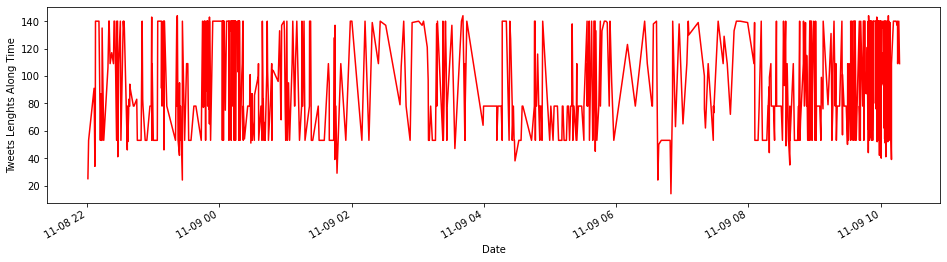

In [ ]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');
plt.ylabel("Tweets Lenghts Along Time")

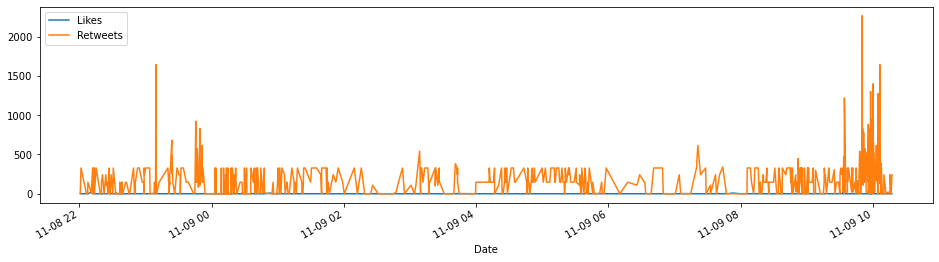

In [ ]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

# 2.3. Pie charts of sources

In [ ]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for Android
* Twitter Web App
* dlvr.it
* Twitter for iPhone
* Twitter for iPad
* Tweetoshi
* Make (formerly Integromat)
* TweetDeck
* WordPress.com
* T7 App
* CoinRotator Bot
* Buffer


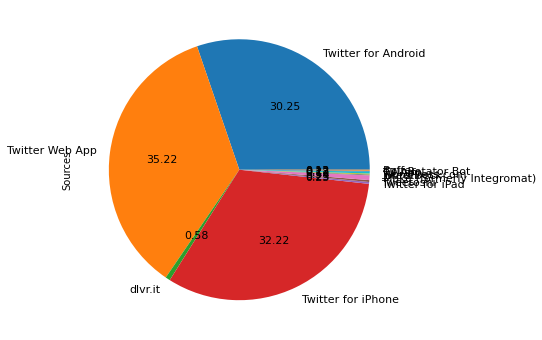

In [ ]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));


# 3. Sentiment analysis

In [ ]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [ ]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweet Text'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

data= data[["Tweet Text","Likes","Retweets", "SA", "Date","location"]]
data.to_csv('C:/Users/Perfect/OneDrive/Desktop/ONLINE PROJECTS/BITCOINS.csv')


,User_id,username,Tweet Text,Len,location,Date,Source,Likes,Retweets,SA
0,1590287369114378240,VickihZx,Easy come easy go Let that sink in FTX binance...,109,,2022-11-09 10:17:09+00:00,Twitter for Android,0,242,1
1,1590287197911257088,SahadadMolla,is BADCOIN right now But i believed it can hap...,140,"Kolkata, India",2022-11-09 10:16:28+00:00,Twitter for Android,0,0,1
2,1590286933015826437,wtfcrypto5,Easy come easy go Let that sink in FTX binance...,109,"Vancouver, BC",2022-11-09 10:15:25+00:00,Twitter Web App,0,242,1
3,1590286910970527744,Jenjen_12345,News BTC Mining On AscendEX AscendEXs innovati...,140,"Binangonan, Calabarzon",2022-11-09 10:15:20+00:00,Twitter for Android,0,20,1
4,1590286837117243392,alertstothemoon,New Trending Coin on CoinGecko change Other tr...,137,,2022-11-09 10:15:02+00:00,dlvr.it,0,0,1
5,1590286598331301888,BalayanJuvs,News BTC Mining On AscendEX AscendEXs innovati...,140,,2022-11-09 10:14:05+00:00,Twitter for Android,0,20,1
6,1590286430903111680,KrimheldP,News BTC Mining On AscendEX AscendEXs innovati...,140,,2022-11-09 10:13:25+00:00,Twitter for Android,0,20,1
7,1590286078531219456,Nanopunk10,Cryptos are junk toys the only people making m...,140,,2022-11-09 10:12:01+00:00,Twitter Web App,0,1,0
8,1590285978241204224,Avelin14324279,News BTC Mining On AscendEX AscendEXs innovati...,140,,2022-11-09 10:11:37+00:00,Twitter for Android,0,20,1
9,1590285527776841728,drakkysnot,Easy come easy go Let that sink in FTX binance...,109,,2022-11-09 10:09:50+00:00,Twitter for iPhone,0,242,1


# 3.2. Analyzing the results

In [ ]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweet Text']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweet Text']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweet Text']) if data['SA'][index] < 0]


In [ ]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweet Text'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweet Text'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweet Text'])))


Percentage of positive tweets: 33.92630241423126%
Percentage of neutral tweets: 41.16899618805591%
Percentage de negative tweets: 24.904701397712834%


In [ ]:
x=format(len(pos_tweets)*100/len(data['Tweet Text']))
y=format(len(neu_tweets)*100/len(data['Tweet Text']))
z=format(len(neg_tweets)*100/len(data['Tweet Text']))
print("Positive Trends",x)
print("Neutral Trends",y)
print("Negative Trends",z)


Positive Trends 33.92630241423126
Neutral Trends 41.16899618805591
Negative Trends 24.904701397712834


In [ ]:
visual=np.array([x,y,z])
mylabels=["Positive", "Neutral","Negative"]


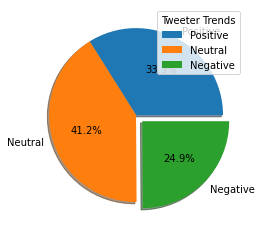

In [ ]:
plot = plt.pie(visual,labels=mylabels, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)
plt.legend(title="Tweeter Trends")


In [ ]:
import matplotlib.pyplot as plt

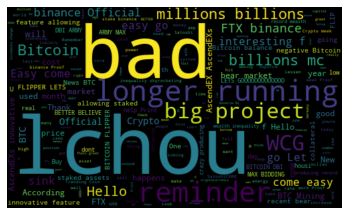

In [ ]:
## plot word Cloud
from wordcloud import WordCloud

allWords=' '.join([twts for twts in data['Tweet Text']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear' )
plt.axis('off')
plt.show()